<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#1.1-Загрузка-и-анлаиз" data-toc-modified-id="1.1-Загрузка-и-анлаиз-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1.1 Загрузка и анлаиз</a></span></li><li><span><a href="#1.2-Предобработка-данных" data-toc-modified-id="1.2-Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>1.2 Предобработка данных</a></span></li><li><span><a href="#1.3-Проверка-сбалансированности-целевых-классов" data-toc-modified-id="1.3-Проверка-сбалансированности-целевых-классов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>1.3 Проверка сбалансированности целевых классов</a></span></li><li><span><a href="#1.4-Подготовка-данных-для-обучения-модели" data-toc-modified-id="1.4-Подготовка-данных-для-обучения-модели-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>1.4 Подготовка данных для обучения модели</a></span></li><li><span><a href="#Выводы-по-шагу-1" data-toc-modified-id="Выводы-по-шагу-1-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выводы по шагу 1</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#3.1-Dummy-классификатор" data-toc-modified-id="3.1-Dummy-классификатор-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>3.1 Dummy классификатор</a></span></li><li><span><a href="#3.2-Логистическая-регрессия" data-toc-modified-id="3.2-Логистическая-регрессия-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>3.2 Логистическая регрессия</a></span></li><li><span><a href="#3.3-Случайный-лес" data-toc-modified-id="3.3-Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>3.3 Случайный лес</a></span></li><li><span><a href="#3.4-Градиентный-бустинг-с-помощью-LightGBM" data-toc-modified-id="3.4-Градиентный-бустинг-с-помощью-LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>3.4 Градиентный бустинг с помощью LightGBM</a></span></li><li><span><a href="#3.5-Градиентный-бустинг-с-помощью-CatBoost" data-toc-modified-id="3.5-Градиентный-бустинг-с-помощью-CatBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>3.5 Градиентный бустинг с помощью CatBoost</a></span></li><li><span><a href="#3.6-Тестирование-моделей" data-toc-modified-id="3.6-Тестирование-моделей-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>3.6 Тестирование моделей</a></span></li><li><span><a href="#Выводы-по-шагу-2" data-toc-modified-id="Выводы-по-шагу-2-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Выводы по шагу 2</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение токсичных комментариев с использованием BERT

Заказчик: интернет-магазин.

Цель: обучить модель выделять токсичные комментарии и для отправки их на модерацию. 
Для этого необходимо решить задачу классификации комментариев на позитивные и негативные.

Заказчиком предоставлены данные с разметкой о токсичности правок.

Критерий успешности: метрика качества *F1* >= 0.75. 

**План**
1. Загрузить и подготовить данные.
2. Обучить модель.
3. Сделать выводы.


**Описание данных**
* *text* содержит текст комментария, 
* *toxic* — целевой признак.

Алгоритм классификации текста с помощью Embeddings:
* Предобработка текста (оставить только слова, привести их к нижнему регистру).
* Токенизация текста.
* Лемматизация текста (в случае использвоания BERT не требуется).
* Очистка текста от стоп-слов и мусорных символов.
* Добавление маркеров (токенов) начала и конца предложения.
* Преобразование каждого исходного текста в массив токенов.
* Передача наборов токенов модели, которая переводит их в векторные представления по общему словарю токенов.
* Нормализация длины векторов до максимальной с помощью нулевых значений.
* Обработка признаков моделью, получение прогнозов.

## Подготовка

### 1.1 Загрузка и анлаиз

In [2]:
# импорты и общие настройки проекта
import time

import numpy as np
import pandas as pd
import re

#import math
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('darkgrid')

%matplotlib inline
import matplotlib.pyplot as plt

# sklearn
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import torch
import transformers as ppb
import tensorflow as tf
from tqdm import notebook

#включим отображение всех столбцов таблиц и округлим числа до тысячных
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 400
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
#print(tf.test.is_built_with_cuda())
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

###tf.debugging.set_log_device_placement(True)
### Place tensors on the CPU
###with tf.device('/CPU:0'):
###"/GPU:0"

In [4]:
# загружаем файл с данными
local_nb_execution = False
try:
    df = pd.read_csv('datasets/data_16/toxic_comments.csv', sep=',') # locally hosted datafile ## , sep='\t'
    local_nb_execution = True
except:
    df = pd.read_csv('/datasets/toxic_comments.csv', sep=',') # Yandex-hosted datafile  ## , sep='\t'

# общий анализ структуры и состава загруженного файла
df.info()
display(df.sample(5))
display(df.describe())
print('\nПолных дубликатов:', df.duplicated().sum())
#print("\nЧисло пропусков в данных:\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


,text,toxic
32325,Link worked fine for me too: http://www.washingtonpost.com/wp-dyn/articles/A18709-2005Mar8.html,0
99263,"Ridiculous \nGood grief, you would think this Aaron Klein person was the most famous guy on the planet as long as this article is. This guy is an obscure Internet writer, not a candidate for US president and leader of the free world.",0
61093,refer to WP:NPOV for more information.,0
99664,"Talkback\n\nI have no idea where to edit the Non-free page, so I'll just tell you on my talk page.",0
26715,"Yeah, there might be a chance. But unless you present like 500 billion pieces of evidence-historical revisions, talk page archives, etc-they might not even look at it. So I'd suggest taking the time to dig up links to the aforementioned so they'll gie you a hearing.",0


,toxic
count,"159,571.000"
mean,0.102
std,0.302
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,1.000



Полных дубликатов: 0


### 1.2 Предобработка данных

Проведём первичную очистку текста: удаление неалфавитных символов, приведение к нижнему регистру

In [5]:
def clear_nonalpha(text):
    #tokens = re.sub(r'[^a-zA-Z ]', ' ', text).split()
    tokens = re.sub(r'[^a-zA-Z \,\:\.\-\!\?\']', ' ', text).split()
    return(' '.join(tokens))

In [6]:
df['text'] = df['text'].apply(clear_nonalpha)
df['text'] = df['text'].str.lower()
display(df.sample(5))

,text,toxic
121394,tusc token b ccb c d d fb i am now proud owner of a tusc account!,0
24830,"possibly not much opportunity for the nickname to stick - the derry gaa londonderry gaa crap was just ridiculous, so i figured a report to wp:aiv was in order. this flag once was red",0
17033,muscle relaxants several documentaries as well as paper sources mention the perps being on muscle relaxants to improve their nerves and possibly to increase resistance to gunfire. yet i do not see that in the article. has this been discussed previously?,0
20837,this is not a new problem with this article and suggest interested editors should read this wikipedia:mediation cabal - -,0
31738,"help? hello roger, i'm the new wikipedia registrant who added the mahiole link on which you commented. another wikipedia editor simple bob deleted this and other contributions i added, claiming them as spam. i'm confused as to why, since all of my links were content-relevant to the pages in which they appeared. can you look into this? i understand the need for vigilance against spam on wikiped...",0


На этом этапе могут появиться дубликаты и пустые значения

In [7]:
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

899
0


In [8]:
print("Empty records:", len(df.query("text==''")))
df = df.query("text!=''").reset_index(drop=True)
print("Empty records:", len(df.query("text==''")))

Empty records: 1
Empty records: 0


Текущая модель настроена на тексты длиной до 512 токенов. В режиме первичной (грубой) подгонки модели удалим длинные тексты.

In [9]:
print("Всего длинных текстов:", len(df[df['text'].str.len() > 512]))
display(df[df['text'].str.len() > 512])

print("Токсичных длинных текстов:", len(df.query('text.str.len() > 512 & toxic == 1')))
display(df.query('text.str.len() > 512 & toxic == 1'))

df = df[df['text'].str.len() <= 512]

Всего длинных текстов: 31833


,text,toxic
3,"more i can't make any real suggestions on improvement - i wondered if the section statistics should be later on, or a subsection of types of accidents -i think the references may need tidying so that they are all in the exact same format ie date format etc. i can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourse...",0
10,"fair use rationale for image:wonju.jpg thanks for uploading image:wonju.jpg. i notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in wikipedia articles constitutes fair use. in addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rational...",0
13,"before you start throwing accusations and warnings at me, lets review the edit itself-making ad hominem attacks isn't going to strengthen your argument, it will merely make it look like you are abusing your power as an admin. now, the edit itself is relevant-this is probably the single most talked about event int he news as of late. his absence is notable, since he is the only living ex-presid...",0
15,"juelz santanas age in , juelz santana was years old, then came february th, which makes juelz turn making songs with the diplomats. the third neff to be signed to cam's label under roc a fella. in , he was years old coming out with his own singles santana's town and down . so yes, he is born in . he really is, how could he be older then lloyd banks? and how could he be when his birthday passed...",0
22,"snowflakes are not always symmetrical! under geometry it is stated that a snowflake always has six symmetric arms. this assertion is simply not true! according to kenneth libbrecht, the rather unattractive irregular crystals are by far the most common variety. http: www.its.caltech.edu atomic snowcrystals myths myths.htm perfection someone really need to take a look at his site and get facts o...",0
...,...,...
158654,"i see this as having been merged undoing one side of a merge forks content in large blocks. see here and here where the article was merged. the prior merge notice indicated discussion, scant, at talk:creature type dungeons dragons which i see you commented at. yes, i feel that most of the leaf-nodes are utterly non-notable this is what lists are for and those lists should largely consist of un...",0
158660,editing of article without consensus removal of cited content without discussion i find it telling that neither of you had the courtesy to respond to my proposal and k went ahead to begin editing the article without any consensus being reached. let the record note that i am now compelled to reciprocate your actions and make my suggested changes. jj obviously lacks any serious knowledge in this...,0
158661,"no he did not, read it again i would have thought everyone here could recite it by heart by now it says are we truly to believe the arbcom are so thankful for that, and jimbo was ever so taken with her . the arbcom having read the evidence are now voting to thank her - so it is a very valid question. kelly always implied she was a friend of jimbo's. good for her, that must be very pleasant for...",0
158662,auto guides and the motoring press are not good sources for an encyclopedia article about luxury vehicle . this is because automakers feed the press a lot of bs boastful superlatives who then work hard to write articles adding even more bs to describe their products. the press earns credits from the hands that feed them. add to this the fact that potential and actual purchasers of luxury vehic...,0


Токсичных длинных текстов: 1959


,text,toxic
42,"you are gay or antisemmitian? archangel white tiger meow! greetingshhh! uh, there are two ways, why you do erased my comment about ww , that holocaust was brutally slaying of jews and not gays gypsys slavs anyone... - if you are anti-semitian, than shave your head bald and go to the skinhead meetings! - if you doubt words of the bible, that homosexuality is a deadly sin, make a pentagram tatoo...",1
58,"my band page's deletion. you thought i was gone. deleting the comment i posted on your 'talk page' does not delete my feelings for your hasty decision to delete my page. you, sir, are still a cock-sucking douche fuck. sit back for a second and think about what your life has become. ............ done? that didn't take long did it? nope. because, as i am most certainly aware, your life is a shit...",1
151,"sorry puck but no one ever said dick was number one!! but he is clearly listed as being second only to batman and a master detective and martial artist and been trained in all the mentioned combat discplines. no need to mention in skills abilities about the battles he's lost and won because thats not what an encylopia is supposed to do. also, what your problem is your going by low end showings...",1
179,"reply above: that was me, loser. the un defines vietnam to be part of southeast asia. and far as i know vietnam is part of asean, and used to be part of french indochina with laos and all those shit countries anyway your culture has always been more influenced by sea than han chinese as in proper yangtze han chinese, not the fringe indigenous tribes in guangzhou guangxi . just admit that you v...",1
206,give me a permanat block raseac....!!! remember me....!!! muslims dont you worry for these images they are trying to hurt us but they cant look these images are fake and have nothing to do with islam or our prophet even their article is so lame wikipedia is not an authentic source its an encyclopedia for the kids which has not authenticity anyone can edit or write whatever they think...just li...,1
...,...,...
158145,"are you fucking retarded? please do not delete content from articles on wikipedia, as you did to solaris film . your edits appear to be vandalism and have been reverted. if you would like to experiment, please use wikipedia:sandbox for test edits. thank you. ali what the fuck is your problem. did you even read what i deleted? do you know what the word plot means? plot does not mean talking abo...",1
158470,"palin satan wow, what a surprise! the one homo that is responsible for vandalism on rep wilson's page is a cock sucking, cross burning republican. it is so cute to see a severely retarded shut-in try out wikipedia and think that she can save it from the communists. joe wilson did something never before seen in a joint session of congress, he shit his pants, i mean he yelled at his superior in ...",1
158579,"thank you. given the misuse of tools here and the itchy trigger finger as exemplified by the thread above, this admin needs to be examined by arbcom. i'm not surprised to see a thread already open at ani discussing it's recent behavioural trends. i won't be initiating anything but will most certainly be presenting evidence at the appropriate time. in the meantime someone needs to tell this adm...",1
158595,"our previous conversation you fucking shit eating liberal, you make lady bird johnson shake on her tampon. i said fucking sorry for my little brother and you still had to fucking complain. my life is fucking shit. my mother is always yelling at me and my dad beats the shit out of me if i get fucking out of line. my brother's one outlet is wikipedia. he cried when he saw my father smacking me, ...",1


In [10]:
df.to_csv('datasets/data_16/df_cleared.csv')

### 1.3 Проверка сбалансированности целевых классов

0   0.888
1   0.112
Name: toxic, dtype: float64


<AxesSubplot:>

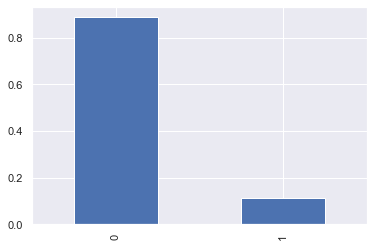

In [11]:
class_balance = df['toxic'].value_counts(normalize=True)
print(class_balance)
class_balance.plot(kind='bar')

Токсичные комментарии составляют лишь 10% от датасета. После векторизации необходимо будет исправить данный дисбаланс.

### 1.4 Подготовка данных для обучения модели

Предолженный датасет имеет большой размер, его обработка с помощью модели требует существенный объём оперативной памяти и процессорного времени.
Поэтому для отладки (и в рамках учебного проекта) он будет сокращён в 10 раз.

In [12]:
df_main, df_selected = train_test_split(df, test_size=16384, random_state=12345) #12288 16384 51200
del df_main
df_selected = df_selected.reset_index(drop=True)
print(df_selected.shape)

(16384, 2)


In [13]:
def calculate_embeddings():
    #model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
    model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'unitary/toxic-bert')

    #MODEL = 'unitary/toxic-bert'
    #tokenizer = AutoTokenizer.from_pretrained(MODEL)
    #model = AutoModel.from_pretrained(MODEL)
    
    # Предобученная модель
    # BERT анализирует контекст, поэтому стоп-слова не удаляем
    tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
    model = model_class.from_pretrained(pretrained_weights)
   
    ## CUDA
    #device = torch.device("cuda:0")
    #model = model.to(device)

    tokenized= features_source.apply(
        lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True))

    max_len = 0
    for i in tokenized.values:
        if len(i) > max_len:
            max_len = len(i)

    padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

    attention_mask = np.where(padded != 0, 1, 0)

    batch_size = 32

    embeddings = []
    ###with tf.device('/GPU:0'):
    for i in notebook.tqdm(range(padded.shape[0] // batch_size)):
        #if(i*batch_size > padded.shape[0]):
        #    batch_size = padded.shape[0] - (i - 1)*batch_size
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
    
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(np.copy(batch_embeddings[0][:,0,:].numpy()))
        ## CUDA
        #embeddings.append(np.copy(batch_embeddings[0][:,0,:].cpu().numpy()))
        del batch
        del attention_mask_batch
        del batch_embeddings

    return pd.DataFrame(np.concatenate(embeddings))

In [14]:
#df_selected = df

#features_source = df_selected['text'] # df['text']
#target = df_selected['toxic'] # df['toxic']

features_source = df_selected['text']
target = df_selected['toxic']


# пытаемся считать заранее сгенерированные фалйлы с данными. Если их нет -- генерируем
embeddings_filename = 'datasets/data_16/embeddings.csv'
dataset_filename = 'datasets/data_16/emb_dataset.csv'
try:
    features = pd.read_csv(embeddings_filename, sep=',', index_col=[0])
    
    # при неполном датасете сохранённая выборка должна соответствовать эмбеддингам
    df_selected = pd.read_csv(dataset_filename, sep=',', index_col=[0])    
    features_source = df_selected['text']
    target = df_selected['toxic']
except:
    features = calculate_embeddings()
    # сохраним результат расчётов чтобы повторно не вычислять при перезапуске
    if(local_nb_execution):
        features.to_csv(embeddings_filename)
        df_selected.to_csv(dataset_filename)
        
features.info()
features.head()

Some weights of the model checkpoint at unitary/toxic-bert were not used when initializing BertModel: ['classifier.weight', 'classifier.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/512 [00:00<?, ?it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Columns: 768 entries, 0 to 767
dtypes: float32(768)
memory usage: 48.0 MB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767
0,0.228,0.393,-0.001,0.431,-0.582,0.294,0.998,0.475,0.100,0.812,1.086,-0.043,-0.293,0.648,0.516,1.119,-0.265,-0.518,-0.767,0.938,-0.283,-0.214,0.788,-0.175,-0.067,-0.215,0.473,0.978,-0.464,-1.271,0.117,-0.679,-0.939,-0.366,0.716,0.970,-0.215,-0.492,-0.986,-0.097,-0.123,-0.623,-0.293,0.412,-1.297,-1.080,-0.085,0.424,-0.349,0.121,-0.367,-0.426,-0.001,-1.063,-0.506,0.552,0.609,-1.350,-0.175,0.797,-0.034,0.204,-1.064,0.016,-0.144,0.663,0.435,-0.049,-0.498,-1.435,-0.322,-0.466,0.446,0.162,0.681,-0.461,0.427,0.069,-0.365,0.324,-0.397,0.055,0.032,-0.129,0.197,-0.037,-0.513,-0.669,0.539,0.756,0.055,-0.733,0.137,-0.401,-0.499,0.590,1.315,-0.270,-0.309,0.291,0.070,0.859,0.833,-0.281,0.091,0.867,0.219,-0.549,-0.566,0.956,-0.896,-0.775,0.831,-0.426,0.096,-0.271,0.169,0.184,-0.545,0.786,0.896,-0.832,0.218,2.156,-0.451,0.166,-0.443,0.755,-0.709,0.010,0.249,0.326,-0.178,0.481,-0.064,-1.227,-0.642,0.187,-1.221,-0.066,0.279,-0.834,-0.232,-0.480,0.017,0.580,0.212,-0.076,-0.206,-0.182,0.088,-0.035,0.819,-1.009,-0.436,-0.875,-0.117,0.354,0.0

Разделим выборку на обучающую, тестовую и валидационную в качестве альтернативы реализации пайплайнов.

In [15]:
#Разделение данных в пропорции 4:3:3
features_train, features_combined, target_train, target_combined = train_test_split(
    features, target, test_size=0.4, stratify=target, random_state=12345)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_combined, target_combined, test_size=0.5, stratify=target_combined, random_state=12345)

print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)
print(features_valid.shape, target_valid.shape)

(9830, 768) (9830,)
(3277, 768) (3277,)
(3277, 768) (3277,)


In [16]:
print(target_train.value_counts(normalize=True))

0   0.888
1   0.112
Name: toxic, dtype: float64


In [17]:
def upsample(features, target, count):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * count)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * count)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [19]:
features_train, target_train = upsample(features_train, target_train, 10)
#features_train, target_train = downsample(features_train, target_train, 0.1)

print(features_train.shape)
print(target_train.value_counts(normalize=True))

(19730, 768)
1   0.558
0   0.442
Name: toxic, dtype: float64


Данные обработаны, очищены, целевые классы в обучающей выборке сбалансированы

### Выводы по шагу 1

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Данные загружены, проведён первичный анализ
* Тексты очищены от не-алфавитных знаков и приведены к нижнему регистру
* Удалено 1293 дубликата
* Датасет сокращён до 10% из-за ограничения по доступным ресурсам. Баланс классов сохранён. Для развёртывания в продуктиве необходимо будет повторить расчёты на полном массиве данных.
* проведён эмбеддинг с помощью модели BERT, факторы и классы сбалансированы для обучения моделей.

## Обучение

In [20]:
# функция оценки с помощью метрики F1
def model_score(target, predictions):
    return f1_score(target, predictions)

scorer = make_scorer(model_score, greater_is_better=True)

In [21]:
model_results = pd.DataFrame({
    'model': [],
    'hyper_params': [],
    'metric':[]
})


# функция, добавляющая результаты в общую таблицу
def add_result(model_desc, hyper_params, metric):
    model_results.loc[model_results.size] = [model_desc, hyper_params, metric]
    model_results.drop_duplicates(inplace=True)

In [22]:
#print(features_train.shape)
#print(features_valid.shape)
#print(features_train)

#Добавляем выборку валидации в GridSearch
split_index = [-1]*(features_train.shape[0]) + [0]*(features_valid.shape[0])
features_tv = pd.concat([features_train, features_valid], ignore_index=True, sort=False)
#features_tv = np.concatenate((features_train, features_valid), axis=0)
target_tv = pd.concat([target_train, target_valid], ignore_index=True, sort=False)
#target_tv = np.concatenate((target_train, target_valid), axis=0)
pds = PredefinedSplit(test_fold = split_index)

#clf = GridSearchCV(estimator = estimator, cv=pds, param_grid=param_grid)
#clf.fit(features_tv, target_tv)
# помним, что predict напрямую работать не будет

### 3.1 Dummy классификатор

In [23]:
model = DummyClassifier(strategy='prior')
model.fit(features_train, target_train)
    
predictions = pd.Series(model.predict(features_valid))
score = model_score(target_valid, predictions)

add_result('DummyClassifier', "", score)
display(model_results)

,model,hyper_params,metric
0,DummyClassifier,,0.201


### 3.2 Логистическая регрессия

In [24]:
model_lr = LogisticRegression()

parameters_lr = {
    'solver': ['liblinear'],
    'C': np.linspace(0.0001, 100, 20)
}

grid_lr = RandomizedSearchCV(model_lr, parameters_lr, scoring=scorer, cv=pds, verbose=0, n_jobs=-1, n_iter=3)
#grid_lr.fit(features_train, target_train)
grid_lr.fit(features_tv, target_tv)

add_result('LogisticRegression', str(grid_lr.best_params_), grid_lr.best_score_)
display(model_results)

,model,hyper_params,metric
0,DummyClassifier,,0.201
3,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.919


### 3.3 Случайный лес

In [25]:
model_rf = RandomForestClassifier(random_state=12345)
    
params_rf = {
    'n_estimators': range(30, 151, 10),
    'max_depth': range(1,15),
    'min_samples_split': range(2,7)
}

grid_rf = RandomizedSearchCV(model_rf, params_rf, scoring=scorer, cv=pds, verbose=0, n_jobs=-1)
#grid_rf.fit(features_train, target_train)
grid_rf.fit(features_tv, target_tv)

add_result('RandomForestClassifier', str(grid_rf.best_params_), grid_rf.best_score_)
display(model_results)

,model,hyper_params,metric
0,DummyClassifier,,0.201
3,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.919
6,RandomForestClassifier,"{'n_estimators': 60, 'min_samples_split': 6, 'max_depth': 13}",0.941


### 3.4 Градиентный бустинг с помощью LightGBM

In [26]:
model_gbm = LGBMClassifier(random_state=12345)
    
params_gbm = {
    'n_estimators': [50, 100, 500],
    'num_leaves': [21, 31, 41, 51], 
    'learning_rate':[0.01, .04, 0.06, 0.3]
}

grid_gbm = RandomizedSearchCV(model_gbm, params_gbm, cv=pds, verbose=0, scoring=scorer)

#grid_gbm.fit(features_train, target_train)
grid_gbm.fit(features_tv, target_tv)


add_result('LGBMClassifier', str(grid_gbm.best_params_), grid_gbm.best_score_)
display(model_results)

,model,hyper_params,metric
0,DummyClassifier,,0.201
3,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.919
6,RandomForestClassifier,"{'n_estimators': 60, 'min_samples_split': 6, 'max_depth': 13}",0.941
9,LGBMClassifier,"{'num_leaves': 41, 'n_estimators': 500, 'learning_rate': 0.04}",0.936


### 3.5 Градиентный бустинг с помощью CatBoost

In [29]:
model_cbr = CatBoostClassifier(verbose=0, random_state=12345) #, task_type='GPU'

params_cbr = {
    'learning_rate': [0.01, .04, 0.06, 0.3, 0.5],
    'iterations': [150, 500]
}

grid_cbr = RandomizedSearchCV(model_cbr, params_cbr, scoring=scorer, cv=pds) #, verbose=0, n_iter=10

#grid_cbr.fit(features_train, target_train)
grid_cbr.fit(features_tv, target_tv)


add_result('CatBoostClassifier', str(grid_cbr.best_params_), grid_cbr.best_score_)
display(model_results)

,model,hyper_params,metric
0,DummyClassifier,,0.201
3,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.919
6,RandomForestClassifier,"{'n_estimators': 60, 'min_samples_split': 6, 'max_depth': 13}",0.941
9,LGBMClassifier,"{'num_leaves': 41, 'n_estimators': 500, 'learning_rate': 0.04}",0.936
12,LGBMClassifier ALT,"{'objective': 'binary', 'num_leaves': 75, 'num_iterations': 500, 'learning_rate': 0.05, 'feature_fraction': 0.8, 'boosting_type': 'gbdt', 'bagging_freq': 2, 'bagging_fraction': 0.8}",0.945
15,CatBoostClassifier,"{'learning_rate': 0.3, 'iterations': 150}",0.938


### 3.6 Тестирование моделей

Проведём тестирование моделей на выявленных оптимальных гиперпараметрах

In [31]:
# функция оценки метрик качества и производительности модели
def calculate_model_performance(model, features_train, target_train, features_test, target_test):
    
    start_time_fit = time.time()
    model.fit(features_train, target_train)
    stop_time_fit = time.time()
    
    fit_time = stop_time_fit - start_time_fit
    
    start_time_predict = time.time()
    predictions = model.predict(features_test)
    stop_time_predict = time.time()
    
    predict_time = stop_time_predict - start_time_predict
    
    metric = model_score(target_test, predictions)
    
    return metric, fit_time, predict_time

In [32]:
model_performance = pd.DataFrame({
    'model': [],
    'hyper_params': [],
    'metric':[],
    'fit_time': [],
    'predict_time': [],
    'total_time': []
})


# функция, добавляющая результаты в общую таблицу
def get_performance(model_desc, hyper_params, model, features_train, target_train, features_test, target_test):
    metric, fit_time, predict_time = calculate_model_performance(model,
                                                               features_train, target_train, features_test, target_test)
    total_time = fit_time + predict_time
    model_performance.loc[model_performance.size] = [model_desc, hyper_params, metric, fit_time, predict_time, total_time]
    model_performance.drop_duplicates(inplace=True)

Логистическая регрессия

In [33]:
model = LogisticRegression(**grid_lr.best_params_)

params = str(grid_lr.best_params_)
model_name = 'LogisticRegression'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)

,model,hyper_params,metric,fit_time,predict_time,total_time
0,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.930,10.368,0.010,10.378


Случайный лес

In [34]:
model = RandomForestClassifier(**grid_rf.best_params_, random_state=12345)
params = str(grid_rf.best_params_)
model_name = 'RandomForestClassifier'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)

,model,hyper_params,metric,fit_time,predict_time,total_time
0,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.930,10.368,0.010,10.378
6,RandomForestClassifier,"{'n_estimators': 60, 'min_samples_split': 6, 'max_depth': 13}",0.945,12.931,0.021,12.952


Light GBM

In [35]:
model = LGBMClassifier(**grid_gbm.best_params_, random_state=12345)

params = str(grid_gbm.best_params_)
model_name = 'LGBMClassifier'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)

D:\ProgramData\Anaconda3\envs\practicum\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


,model,hyper_params,metric,fit_time,predict_time,total_time
0,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.930,10.368,0.010,10.378
6,RandomForestClassifier,"{'n_estimators': 60, 'min_samples_split': 6, 'max_depth': 13}",0.945,12.931,0.021,12.952
12,LGBMClassifier,"{'objective': 'binary', 'num_leaves': 75, 'num_iterations': 500, 'learning_rate': 0.05, 'feature_fraction': 0.8, 'boosting_type': 'gbdt', 'bagging_freq': 2, 'bagging_fraction': 0.8}",0.955,8.632,0.038,8.670


CatBoost

In [36]:
model = CatBoostClassifier(**grid_cbr.best_params_, random_state=12345, verbose=0)

params = str(grid_cbr.best_params_)
model_name = 'CatBoostClassifier'

get_performance(model_name, params, model, features_train, target_train, features_test, target_test)
display(model_performance)

,model,hyper_params,metric,fit_time,predict_time,total_time
0,LogisticRegression,"{'solver': 'liblinear', 'C': 42.10532105263158}",0.930,10.368,0.010,10.378
6,RandomForestClassifier,"{'n_estimators': 60, 'min_samples_split': 6, 'max_depth': 13}",0.945,12.931,0.021,12.952
12,LGBMClassifier,"{'objective': 'binary', 'num_leaves': 75, 'num_iterations': 500, 'learning_rate': 0.05, 'feature_fraction': 0.8, 'boosting_type': 'gbdt', 'bagging_freq': 2, 'bagging_fraction': 0.8}",0.955,8.632,0.038,8.670
18,CatBoostClassifier,"{'learning_rate': 0.3, 'iterations': 150}",0.940,6.440,0.053,6.493


### Выводы по шагу 2

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Проведено обучение моделей Логистической регрессии, случайного леса, бустинговых моделей LightGBM и CatBoost
* Модели проверены на адекватность с помощью Dummy классификатора
* Проведено тестирование производительности и вычисление f1-метрики качества
* Наилучшей по метрике (F1=0.955) и скорости предсказания является модель LGBMClassifier с параметрами	{'objective': 'binary', 'num_leaves': 75, 'num_iterations': 500, 'learning_rate': 0.05, 'feature_fraction': 0.8, 'boosting_type': 'gbdt', 'bagging_freq': 2, 'bagging_fraction': 0.8}

## Выводы

### Общий вывод

<div class="alert alert-block alert-info">
    <b class="alert-heading"></b>
</div>

* Данные загружены, проведён первичный анализ
* Тексты очищены от не-алфавитных знаков и приведены к нижнему регистру
* Удалено 1293 дубликата
* Датасет сокращён до 10% из-за ограничения по доступным ресурсам.  Баланс классов сохранён. Для развёртывания в продуктиве необходимо будет повторить расчёты на полном массиве данных.
* проведён эмбеддинг с помощью модели BERT, факторы и классы обучающей выборки сбалансированы методом апсемплинга.

* Проведено обучение моделей Логистической регрессии, случайного леса, бустинговых моделей LightGBM и CatBoost
* Проведено тестирование производительности и расчёт f1-метрики моделей
* Все опробованные модели адекватны и применимы в работе, незначительно лидирует LGBMClassifier

Удаление части данных производилось в рамках работы с моделью BERT 'distilbert-base-uncased' (наилучшая полученная метрика F1=0.73). Так как в рабамках проекта работа всё равно ведётся с выборкой данных, данное удаление не влияет существенно на результат.